In [1]:
#   Copyright 2023 Phasecraft Ltd.
#
#   Licensed under the Apache License, Version 2.0 (the "License");
#   you may not use this file except in compliance with the License.
#   You may obtain a copy of the License at
#
#       http://www.apache.org/licenses/LICENSE-2.0
#
#   Unless required by applicable law or agreed to in writing, software
#   distributed under the License is distributed on an "AS IS" BASIS,
#   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#   See the License for the specific language governing permissions and
#   limitations under the Licensefrom pathlib import Path

In [ ]:
import sys
sys.path.append(str(Path("..", "lib").resolve()))

import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, median_abs_deviation
from time import time
from functools import reduce

import analysis_helpers
import generalized_binomial_sum
from importlib import reload
generalized_binomial_sum = reload(generalized_binomial_sum)
from optimal_angles import optimal_angles

In [2]:
# Set up directories

logger = logging.getLogger()
logger.setLevel(logging.INFO)

DATA_DIRECTORY_QAOA = Path("..", "data", "data_save_analytic_compare")
DATA_DIRECTORY = Path("..", "data", "data_save_analytic_compare_8sat_other_solvers")
SAVE_ANALYTIC_EXPONENTS_DIRECTORY = Path("..", "data", "analytic_exponents")
DATA_SUMMARY_FILENAME = Path("..", "data", "data_save_analytic_compare", "summary.json")
FIGURES_DIRECTORY = Path("..", "figures")

FIGURES_DIRECTORY.mkdir(exist_ok=True)

In [3]:
# Set up figures

def figsize_revtex(scale=1., ratio=3/4):
    """
    Standard figsize for a one-column figure in a revtex document. The standard
    aspect ratio chosen here is the golden ratio.
    """
    fig_width_pt = 246               # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27        # Convert pt to inch
    fig_width = fig_width_pt * inches_per_pt * scale    # width in inches
    fig_height = fig_width * ratio              # height in inches
    fig_size = (fig_width, fig_height)
    return fig_size

def pt2inch(length):
    inches_per_pt = 1.0/72.27        # Convert pt to inch
    return length * inches_per_pt

pgf_with_latex = {               # setup matplotlib to use latex for output
#     "pgf.texsystem": "pdflatex",   # change this if using xetex or lautex
#     "text.usetex": False,            # use LaTeX to write all text
#    "font.family": "sans-serif",
#    "font.serif": [],               # should cause plots to inherit fonts from the document
    "font.sans-serif" : "Arial",
    "mathtext.fontset": "custom",
    "mathtext.rm": "sans",
    "mathtext.it": "sans:italic",
    "mathtext.default": "it",
    "font.monospace" : [],
    "axes.labelsize" : 8,      # LaTeX default is 10pt font.
    "font.size" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" : 8,
    "legend.fontsize" : 6,
#    "pgf.rcfonts" : false,
    "lines.linewidth" : 0.75,
    "axes.linewidth" : 0.5,      # nature physics insists on 1pt lines
    "lines.markersize": 3,
    "axes.grid"           : False,
    "legend.frameon" : True,
    "patch.linewidth" : 0.5,
}
plt.matplotlib.rcParams.update(pgf_with_latex)

In [4]:
# Get QAOA benchmarks
print("Loading QAOA benchmarks...")
qaoa_benchmarks_df = analysis_helpers.load_qaoa_benchmarks(DATA_DIRECTORY_QAOA)

print("Loading Schoning+QAOA benchmarks...")
schoning_qaoa_benchmarks_df = analysis_helpers.load_schoning_qaoa_benchmarks(DATA_DIRECTORY)

# Get other benchmarks
print("Loading WalkSATlm benchmarks...")
walksatlm_df = analysis_helpers.load_walksatlm_benchmarks(DATA_DIRECTORY)

print("Loading PySAT benchmarks...")
pysat_benchmarks_df = analysis_helpers.load_pysat_benchmarks(DATA_DIRECTORY)

# Get saved analytic exponents
print("Loading analytic exponents...")
saved_analytic_exponents = []
for saved_analytic_exponent_file in SAVE_ANALYTIC_EXPONENTS_DIRECTORY.glob("analytic_exponent*json"):
    with saved_analytic_exponent_file.open("r") as f:
        saved_analytic_exponents.append(json.load(f))
saved_analytic_exponents_df = pd.DataFrame(saved_analytic_exponents)

# Get summary results
print("Getting summary results...")
with DATA_SUMMARY_FILENAME.open("r") as f:
    summary_results = json.load(f)
summary_results_df = pd.DataFrame(summary_results)
summary_results_df["empirical_excess_exponent"] = summary_results_df["empirical_exponent"] + summary_results_df["r"] * 2.0 ** (-summary_results_df["k"]) / np.log(2)
summary_results_df["empirical_exponent_relative_error"] = summary_results_df["empirical_exponent_error"] / summary_results_df["empirical_exponent"]
summary_results_df["empirical_excess_exponent_relative_error"] = summary_results_df["empirical_exponent_error"] / summary_results_df["empirical_excess_exponent"]
summary_results_df["empirical_exponent_runtime_relative_error"] = summary_results_df["empirical_exponent_runtime_error"] / summary_results_df["empirical_exponent_runtime"]


INFO:root:result 0
INFO:root:result 1000


Loading QAOA benchmarks...


INFO:root:result 2000
INFO:root:result 3000
INFO:root:result 4000
INFO:root:result 5000
INFO:root:result 6000
INFO:root:result 7000
INFO:root:result 8000
INFO:root:result 9000
INFO:root:result 10000
INFO:root:result 11000
INFO:root:result 12000
INFO:root:result 13000
INFO:root:result 14000
INFO:root:result 15000
INFO:root:result 16000
INFO:root:result 17000
INFO:root:result 18000
INFO:root:result 19000
INFO:root:result 20000
INFO:root:result 21000
INFO:root:result 22000
INFO:root:result 23000
INFO:root:result 24000
INFO:root:result 25000
INFO:root:result 26000
INFO:root:result 27000
INFO:root:result 28000
INFO:root:result 29000
INFO:root:result 30000
INFO:root:result 31000
INFO:root:result 32000
INFO:root:result 33000
INFO:root:result 34000
INFO:root:result 35000
INFO:root:result 36000
INFO:root:result 37000
INFO:root:result 38000
INFO:root:result 39000
INFO:root:result 40000
INFO:root:result 41000
INFO:root:result 42000
INFO:root:result 43000
INFO:root:result 44000
INFO:root:result 45

INFO:root:result 348000
INFO:root:result 349000
INFO:root:result 350000
INFO:root:result 351000
INFO:root:result 352000
INFO:root:result 353000
INFO:root:result 354000
INFO:root:result 355000
INFO:root:result 356000
INFO:root:result 357000
INFO:root:result 358000
INFO:root:result 359000
INFO:root:result 360000
INFO:root:result 361000
INFO:root:result 362000
INFO:root:result 363000
INFO:root:result 364000
INFO:root:result 365000
INFO:root:result 366000
INFO:root:result 367000
INFO:root:result 368000
INFO:root:result 369000
INFO:root:result 370000
INFO:root:result 371000
INFO:root:result 372000
INFO:root:result 373000
INFO:root:result 374000
INFO:root:result 375000
INFO:root:result 376000
INFO:root:result 377000
INFO:root:result 378000
INFO:root:result 379000
INFO:root:result 380000
INFO:root:result 381000
INFO:root:result 382000
INFO:root:result 383000
INFO:root:result 384000
INFO:root:result 385000
INFO:root:result 386000
INFO:root:result 387000
INFO:root:result 388000
INFO:root:result

INFO:root:result 690000
INFO:root:result 691000
INFO:root:result 692000
INFO:root:result 693000
INFO:root:result 694000
INFO:root:result 695000
INFO:root:result 696000
INFO:root:result 697000
INFO:root:result 698000
INFO:root:result 699000
INFO:root:result 700000
INFO:root:result 701000
INFO:root:result 702000
INFO:root:result 703000
INFO:root:result 704000
INFO:root:result 705000
INFO:root:result 706000
INFO:root:result 707000
INFO:root:result 708000
INFO:root:result 709000
INFO:root:result 710000
INFO:root:result 711000
INFO:root:result 712000
INFO:root:result 713000
INFO:root:result 714000
INFO:root:result 715000
INFO:root:result 716000
INFO:root:result 717000
INFO:root:result 718000
INFO:root:result 719000
INFO:root:result 720000
INFO:root:result 721000
INFO:root:result 722000
INFO:root:result 723000
INFO:root:result 724000
INFO:root:result 725000
INFO:root:result 726000
INFO:root:result 727000
INFO:root:result 728000
INFO:root:result 729000
INFO:root:result 730000
INFO:root:result

INFO:root:result 1031000
INFO:root:result 1032000
INFO:root:result 1033000
INFO:root:result 1034000
INFO:root:result 1035000
INFO:root:result 1036000
INFO:root:result 1037000
INFO:root:result 1038000
INFO:root:result 1039000
INFO:root:result 1040000
INFO:root:result 1041000
INFO:root:result 1042000
INFO:root:result 1043000
INFO:root:result 1044000
INFO:root:result 1045000
INFO:root:result 1046000
INFO:root:result 1047000
INFO:root:result 1048000
INFO:root:result 1049000
INFO:root:result 1050000
INFO:root:result 1051000
INFO:root:result 1052000
INFO:root:result 1053000
INFO:root:result 1054000
INFO:root:result 1055000
INFO:root:result 1056000
INFO:root:result 1057000
INFO:root:result 1058000
INFO:root:result 1059000
INFO:root:result 1060000
INFO:root:result 1061000
INFO:root:result 1062000
INFO:root:result 1063000
INFO:root:result 1064000
INFO:root:result 1065000
INFO:root:result 1066000
INFO:root:result 1067000
INFO:root:result 1068000
INFO:root:result 1069000
INFO:root:result 1070000


INFO:root:result 1359000
INFO:root:result 1360000
INFO:root:result 1361000
INFO:root:result 1362000
INFO:root:result 1363000
INFO:root:result 1364000
INFO:root:result 1365000
INFO:root:result 1366000
INFO:root:result 1367000
INFO:root:result 1368000
INFO:root:result 1369000
INFO:root:result 1370000
INFO:root:result 1371000
INFO:root:result 1372000
INFO:root:result 1373000
INFO:root:result 1374000
INFO:root:result 1375000
INFO:root:result 1376000
INFO:root:result 1377000
INFO:root:result 1378000
INFO:root:result 1379000
INFO:root:result 1380000
INFO:root:result 1381000
INFO:root:result 1382000
INFO:root:result 1383000
INFO:root:result 1384000
INFO:root:result 1385000
INFO:root:result 1386000
INFO:root:result 1387000
INFO:root:result 1388000
INFO:root:result 1389000
INFO:root:result 1390000
INFO:root:result 1391000
INFO:root:result 1392000
INFO:root:result 1393000
INFO:root:result 1394000
INFO:root:result 1395000
INFO:root:result 1396000
INFO:root:result 1397000
INFO:root:result 1398000


INFO:root:result 1687000
INFO:root:result 1688000
INFO:root:result 1689000
INFO:root:result 1690000
INFO:root:result 1691000
INFO:root:result 1692000
INFO:root:result 1693000
INFO:root:result 1694000
INFO:root:result 1695000
INFO:root:result 1696000
INFO:root:result 1697000
INFO:root:result 1698000
INFO:root:result 1699000
INFO:root:result 1700000
INFO:root:result 1701000
INFO:root:result 1702000
INFO:root:result 1703000
INFO:root:result 1704000
INFO:root:result 1705000
INFO:root:result 1706000
INFO:root:result 1707000
INFO:root:result 1708000
INFO:root:result 1709000
INFO:root:result 1710000
INFO:root:result 1711000
INFO:root:result 1712000
INFO:root:result 1713000
INFO:root:result 1714000
INFO:root:result 1715000
INFO:root:result 1716000
INFO:root:result 1717000
INFO:root:result 1718000
INFO:root:result 1719000
INFO:root:result 1720000
INFO:root:result 1721000
INFO:root:result 1722000
INFO:root:result 1723000
INFO:root:result 1724000
INFO:root:result 1725000
INFO:root:result 1726000


Loading Schoning+QAOA benchmarks...


INFO:root:result 1000
INFO:root:result 2000
INFO:root:result 3000
INFO:root:result 4000
INFO:root:result 5000
INFO:root:result 6000
INFO:root:result 7000
INFO:root:result 8000
INFO:root:result 9000
INFO:root:result 10000
INFO:root:result 11000
INFO:root:result 12000
INFO:root:result 13000
INFO:root:result 14000
INFO:root:result 15000
INFO:root:result 16000
INFO:root:result 17000
INFO:root:result 18000
INFO:root:result 19000
INFO:root:result 20000
INFO:root:result 21000
INFO:root:result 22000
INFO:root:result 23000
INFO:root:result 24000
INFO:root:result 25000
INFO:root:result 26000
INFO:root:result 27000
INFO:root:result 28000
INFO:root:result 29000
INFO:root:result 30000
INFO:root:result 31000
INFO:root:result 32000
INFO:root:result 33000
INFO:root:result 34000
INFO:root:result 35000
INFO:root:result 0
INFO:root:result 1000


Loading WalkSATlm benchmarks...


INFO:root:result 2000
INFO:root:result 3000
INFO:root:result 4000
INFO:root:result 5000
INFO:root:result 6000
INFO:root:result 7000
INFO:root:result 8000
INFO:root:result 9000
INFO:root:result 10000
INFO:root:result 11000
INFO:root:result 12000
INFO:root:result 13000
INFO:root:result 14000
INFO:root:result 15000
INFO:root:result 16000
INFO:root:result 17000
INFO:root:result 18000
INFO:root:result 19000
INFO:root:result 20000
INFO:root:result 21000
INFO:root:result 22000
INFO:root:result 23000
INFO:root:result 24000
INFO:root:result 25000
INFO:root:result 26000
INFO:root:result 27000
INFO:root:result 28000
INFO:root:result 29000
INFO:root:result 30000
INFO:root:result 31000
INFO:root:result 32000
INFO:root:result 33000
INFO:root:result 34000
INFO:root:result 35000
INFO:root:result 0
INFO:root:result 1000


Loading PySAT benchmarks...


INFO:root:result 2000
INFO:root:result 3000
INFO:root:result 4000
INFO:root:result 5000
INFO:root:result 6000
INFO:root:result 7000
INFO:root:result 8000
INFO:root:result 9000
INFO:root:result 10000
INFO:root:result 11000
INFO:root:result 12000
INFO:root:result 13000
INFO:root:result 14000
INFO:root:result 15000
INFO:root:result 16000
INFO:root:result 17000
INFO:root:result 18000
INFO:root:result 19000
INFO:root:result 20000
INFO:root:result 21000
INFO:root:result 22000
INFO:root:result 23000
INFO:root:result 24000
INFO:root:result 25000
INFO:root:result 26000
INFO:root:result 27000
INFO:root:result 28000
INFO:root:result 29000
INFO:root:result 30000
INFO:root:result 31000
INFO:root:result 32000
INFO:root:result 33000
INFO:root:result 34000
INFO:root:result 35000


Loading analytic exponents...
Getting summary results...


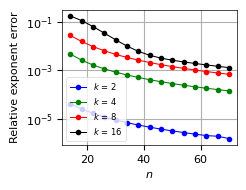

In [5]:
# p=1 relative errors in the exponent

n_min, n_max, n_step = 10, 71, 4
n_values = np.arange(n_min, n_max + 1, n_step)
q_r_values = [(1, 1.0), (2, 9.93), (3, 176.54), (4, 45425.2)]
landscape_n, landscape_fit_points, landscape_resolution, landscape_rescalings = 20, 10, 4, [1.0, 0.5, 0.25]
colors = ["b", "g", "r", "k"]

plot_data = []
for idx, (q, r) in enumerate(q_r_values):
    k = 2 ** q
    betas, gammas = optimal_angles[(k, r)][1]["betas"], optimal_angles[(k, r)][1]["gammas"]
    A, b, c = generalized_binomial_sum.generalized_binomial_sum_random_pow2_sat_data(r, betas, gammas)
    sum_values = np.array([generalized_binomial_sum.generalized_flip_symmetric_multinomial_sum_p1(q, A, b, c, n) for n in n_values])
    sum_ratios = (sum_values[1:] / sum_values[:-1]) ** (1 / (n_values[1:] - n_values[:-1]))# * np.exp(-2 ** (-k) * r)
    num_iter, zstar, dz, exponent = generalized_binomial_sum.generalized_binomial_sum_scaling_exponent_ksat(q, r, betas, gammas, num_iter=300, dz_threshold=1e-10, damping=0.9)
    #ax.plot(n_values[1:], np.log(sum_ratios.real) / (exponent.real - r * 2 ** (-k)) - 1, "-o", color=colors[idx], label=f"$k$ = {k}")
    #ax.plot(n_values[1:], np.log(sum_ratios.real) / exponent.real - 1, "-o", color=colors[idx], label=f"$k$ = {k}")
    plot_data.append((n_values[1:], np.abs(np.log(sum_ratios.real) / exponent.real - 1)))

fig, ax = plt.subplots(figsize=figsize_revtex(2/3))
for idx, (q, r) in enumerate(q_r_values):
    k = 2 ** q
    ax.semilogy(*plot_data[idx], "-o", color=colors[idx], label=f"$k$ = {k}")
ax.set_xlabel("$n$")
ax.set_ylabel("Relative exponent error")
#plt.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.35))
ax.legend()
fig.tight_layout(pad=0)
plt.grid()
plt.savefig(Path(FIGURES_DIRECTORY, "exponent_relative_error.pdf"), bbox_inches="tight")

******************** k = 2 ********************
[ 1  2  3  4  5  6  7  8  9 10]
[0.1188702  0.06473071 0.04111148 0.03071493 0.02341345 0.01814162
 0.01476605 0.01244213 0.01059493 0.00932065]
exponent = 0.13417782388875002*p^-1.128465555937889
******************** k = 4 ********************
[ 1  2  3  4  5  6  7  8  9 10]
[0.52997227 0.40648098 0.33795859 0.29253021 0.25883296 0.23231049
 0.2106802  0.19282664 0.17838665 0.16549626]
exponent = 0.5678138097368761*p^-0.5115584482890002
******************** k = 8 ********************
[ 1  2  3  4  5  6  7  8  9 10]
[0.67575593 0.55782387 0.4909771  0.44719298 0.41495542 0.38989858
 0.36921589 0.35190173 0.33865189 0.3265543 ]
exponent = 0.6893888446598346*p^-0.32019991393434205


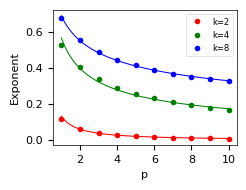

In [6]:
fig, ax = plt.subplots(figsize=figsize_revtex(2/3))

cols = ["r", "g", "b", "k"]

for index, k in enumerate(sorted(summary_results_df["k"].unique())):
    print(f"******************** k = {k} ********************")
    summary_results_fixed_k_df = summary_results_df.query(f"k == {k}")
    # Show analytic results for all p
    pvals = summary_results_fixed_k_df["p"].to_numpy()
    exps = -summary_results_fixed_k_df["analytic_exponent"].to_numpy()
    # Discard NaN values
    if len(pvals) > 10:
        pvals = pvals[:10]
        exps = exps[:10]
    print(pvals)
    print(exps)
    a, b = np.polyfit(np.log(pvals), np.log(exps), 1)
    print(f'exponent = {np.exp(b)}*p^{a}')
    #    log y = b log x + a
    #    y = e^a*x^b

    xrange = np.arange(1,np.max(pvals),0.01)
    
    ax.plot(pvals, exps, 'o', label=f"k={k}", color=cols[index])
    ax.plot(xrange, [np.exp(b) * p ** a for p in xrange], color=cols[index])
    ax.set_ylabel("Exponent")
    ax.set_xlabel("p")
    index += 1
    
ax.legend()
fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, f"k_{k}_scalingwithp.pdf"), bbox_inches="tight")

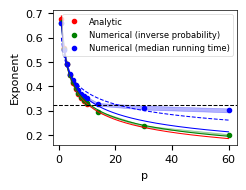

In [7]:
fig, ax = plt.subplots(figsize=figsize_revtex(2/3))

cols = ["r", "g", "b", "k"]

k = 8

summary_results_fixed_k_df = summary_results_df.query(f"k == {k}")
# Show analytic results for all p
pvals = summary_results_fixed_k_df["p"].to_numpy()
exps_analytic = -summary_results_fixed_k_df["analytic_exponent"].to_numpy()
exps_numeric_prob = -summary_results_fixed_k_df["empirical_exponent"].to_numpy()
exps_numeric_prob_error = summary_results_fixed_k_df["empirical_exponent_error"].to_numpy()
exps_numeric_median = summary_results_fixed_k_df["empirical_exponent_runtime"].to_numpy()
exps_numeric_median_error = summary_results_fixed_k_df["empirical_exponent_runtime_error"].to_numpy()
# Discard NaN values
#if len(pvals) > 10:
#    pvals = pvals[:10]
#    exps = exps[:10]

a_analytic, b_analytic = np.polyfit(np.log(pvals[:10]), np.log(exps_analytic[:10]), 1)
a_numeric_prob, b_numeric_prob = np.polyfit(np.log(pvals), np.log(exps_numeric_prob), 1)
a_numeric_median, b_numeric_median = np.polyfit(np.log(pvals), np.log(exps_numeric_median), 1)
a_numeric_median_short, b_numeric_median_short = np.polyfit(np.log(pvals[:10]), np.log(exps_numeric_median[:10]), 1)
#print(f'exponent = {np.exp(b)}*p^{a}')
#    log y = b log x + a
#    y = e^a*x^b

xrange = np.arange(1,np.max(pvals),0.01)

ax.plot(pvals, exps_analytic, 'o', label="Analytic", color="r")
ax.plot(pvals, exps_numeric_prob, 'o', label="Numerical (inverse probability)", color="g")
ax.fill_between(pvals, exps_numeric_prob - exps_numeric_prob_error, exps_numeric_prob + exps_numeric_prob_error, alpha=0.3, color="g")
ax.plot(pvals, exps_numeric_median, 'o', label="Numerical (median running time)", color="b")
ax.fill_between(pvals, exps_numeric_median - exps_numeric_median_error, exps_numeric_median + exps_numeric_median_error, alpha=0.3, color="b")
ax.plot(xrange, [np.exp(b_analytic) * p ** a_analytic for p in xrange], color="r")
ax.plot(xrange, [np.exp(b_numeric_prob) * p ** a_numeric_prob for p in xrange], color="g")
ax.plot(xrange, [np.exp(b_numeric_median) * p ** a_numeric_median for p in xrange], color="b", linestyle="dashed")
ax.plot(xrange, [np.exp(b_numeric_median_short) * p ** a_numeric_median_short for p in xrange], color="b")
ax.set_ylabel("Exponent")
ax.set_xlabel("p")
ax.axhline(0.325, color="k", linestyle="dashed")
    
ax.legend()
fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, f"k_{k}_scalingwithp_multiple.pdf"), bbox_inches="tight")

[ 1  2  3  4  5  6  7  8  9 10 14 30 60]
Loading p=1
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[3.53852578e-03 2.27544864e-03 1.44764647e-03 9.16658286e-04
 5.90210874e-04 3.69698895e-04 2.31894704e-04 1.42023112e-04
 9.44307111e-05]
p=1 2**(-0.658520375254191n + -0.2191994921686201)
Loading p=2
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.00921642 0.0063651  0.00432873 0.00295155 0.00203876 0.0013775
 0.00092817 0.00061383 0.00044112]
p=2 2**(-0.5534164862595246n + -0.10587771228997693)
Loading p=4
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.02651263 0.01968768 0.01429012 0.01055434 0.0078362  0.00569508
 0.0041006  0.00293852 0.00226742]
p=4 2**(-0.4485814653242474n + 0.15778426097013867)
Loading p=8
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.07506239 0.05984873 0.04583239 0.03632174 0.02872177 0.02219467
 0.01693452 0.01309617 0.01087561]
p=8 2**(-0.35513204987163444n + 0.537054181857411)
Loading p=30
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.33408651 0.29084842 0.24142863 0.20943259 0.17724713 0.1529

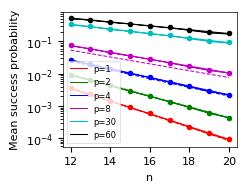

In [8]:

# Empirical vs theoretical fit for k=8

# Demonstrates empirical probabilities match the theoretical values very well;
# that they fit exponential decay very well; and that the constant factors aren't too bad.
k = 8
summary_results_fixed_k_df = summary_results_df.query(f"k == {k}")
pvals = summary_results_fixed_k_df["p"].to_numpy()
#for p in pvals:
print(pvals)
colours = {1: 'r', 2: 'g', 4: 'b', 8: 'm', 30: 'lime', 14: 'c', 30: 'c', 60: 'k'}

fig, ax = plt.subplots(figsize=figsize_revtex(2/3))

for p in [1,2,4,8,30,60]:
    print(f"Loading p={p}")
    summary_results_fixed_kp_df = summary_results_fixed_k_df.query(f"p == {p}")
    #print(summary_results_fixed_kp_df)
    analytic_exp = -summary_results_fixed_kp_df["analytic_exponent"].to_numpy()[0]
    empirical_x = summary_results_fixed_kp_df["empirical_exponent_fit_curve_x"].to_numpy()[0]
    empirical_y = np.array(summary_results_fixed_kp_df["empirical_exponent_fit_curve_y_mean"].to_numpy()[0])
    empirical_y_errs = summary_results_fixed_kp_df["empirical_exponent_fit_curve_y_std"].to_numpy()[0]
    empirical_y_count = summary_results_fixed_kp_df["empirical_exponent_fit_curve_y_count"].to_numpy()[0]
    empirical_y_prob = [1/y for y in empirical_y]
    empirical_y_med = summary_results_fixed_kp_df["empirical_runtime_exponent_fit_curve_y_median"].to_numpy()[0]
    empirical_y_med_errs = summary_results_fixed_kp_df["empirical_runtime_exponent_fit_curve_y_median_abs_deviation"].to_numpy()[0]
    empirical_y_med_count = summary_results_fixed_kp_df["empirical_runtime_exponent_fit_curve_y_count"].to_numpy()[0]
#    y = 2^{en}
#    e = log y / log n
    print(empirical_x)
    print(empirical_y)
#    y = 2^{-e x}
#    log y = -e 
#    plt.plot(empirical_x, [np.log2(y) / x for x,y in zip(empirical_x,empirical_y_runtime)])
#    plt.plot(empirical_x, [np.log2(y) / x for x,y in zip(empirical_x,empirical_y_med)])
    a, b = np.polyfit(empirical_x, [np.log2(y) for y in empirical_y], 1)
    print(f"{p=} 2**({a}n + {b})")
    ax.semilogy(empirical_x, empirical_y, 'o', color=colours[p])
    ax.fill_between(empirical_x, empirical_y - empirical_y_errs / np.sqrt(empirical_y_count), empirical_y + empirical_y_errs / np.sqrt(empirical_y_count), color=colours[p])
    ax.semilogy(empirical_x, [2**(a*x+b) for x in empirical_x], color=colours[p], label=f"p={p}")
    ax.semilogy(empirical_x, [2**(-analytic_exp*x) for x in empirical_x], color=colours[p], linestyle='dashed')
#    plt.axhline(analytic_exp, color="k", linestyle="dashed")

ax.set_xlabel("n")
ax.set_ylabel("Mean success probability")
ax.legend()
fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, "8_sat_fits.pdf"), bbox_inches="tight")
#plt.show()

[ 1  2  3  4  5  6  7  8  9 10 14 30 60]
Loading p=1
p=1 2**(0.6595928896436642n + 0.5268349914227465) [median] or p=1 2**(0.658520375254191n + 0.2191994921686201) [prob]
[350.5792564185915, 549.6185740270289, 860.6837328336115, 1378.4695915664172, 2113.514892719282, 3393.7676168881494, 5431.222722770085, 9083.66912790143, 12931.434971646471]
[282.6035648279715, 439.4737737795216, 690.7763879123048, 1090.9190651848778, 1694.3096836420216, 2704.903948793777, 4312.302027007059, 7041.107508461349, 10589.775171987894]
Loading p=2
p=2 2**(0.5511299614511248n + 0.41376832432419786) [median] or p=2 2**(0.5534164862595246n + 0.10587771228997693) [prob]
[131.68513658122043, 191.06731564680857, 278.64520032969017, 407.11675435411263, 599.3108925059356, 872.3096752379365, 1279.7336336630074, 2002.2054383452737, 2686.1044357708215]
[108.50196626063345, 157.10677259809623, 231.01483632078518, 338.80553821065166, 490.4934126550551, 725.9514469503507, 1077.3869134486486, 1629.1086932114158, 2266.9424

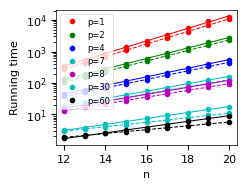

In [9]:
# Empirical inverse success probability vs median runtime

k = 8
summary_results_fixed_k_df = summary_results_df.query(f"k == {k}")
pvals = summary_results_fixed_k_df["p"].to_numpy()
#for p in pvals:
print(pvals)
colours = {1: 'r', 2: 'g', 4: 'b', 8: 'm', 30: 'lime', 7: 'c', 30: 'c', 60: 'k'}

fig, ax = plt.subplots(figsize=figsize_revtex(2/3))

for p in [1,2,4,7,8,30,60]:
#for p in [1,2,4,8]:
    print(f"Loading p={p}")
    summary_results_fixed_kp_df = summary_results_fixed_k_df.query(f"p == {p}")
    #print(summary_results_fixed_kp_df)
#    analytic_exp = -summary_results_fixed_kp_df["analytic_exponent"].to_numpy()[0]
    empirical_x = summary_results_fixed_kp_df["empirical_exponent_fit_curve_x"].to_numpy()[0]
    empirical_y = np.array(summary_results_fixed_kp_df["empirical_exponent_fit_curve_y_mean"].to_numpy()[0])
    empirical_y_errs = summary_results_fixed_kp_df["empirical_exponent_fit_curve_y_std"].to_numpy()[0]
    empirical_y_prob = [1/y for y in empirical_y]
    empirical_y_med = summary_results_fixed_kp_df["empirical_runtime_exponent_fit_curve_y_median"].to_numpy()[0]
#    y = 2^{en}
#    e = log y / log n
#    print(empirical_x)
#    print(empirical_y)
#    y = 2^{-e x}
#    log y = -e 
#    plt.plot(empirical_x, [np.log2(y) / x for x,y in zip(empirical_x,empirical_y_runtime)])
#    plt.plot(empirical_x, [np.log2(y) / x for x,y in zip(empirical_x,empirical_y_med)])
    a_prob, b_prob = np.polyfit(empirical_x, [np.log2(y) for y in empirical_y_prob], 1)
    a_med, b_med = np.polyfit(empirical_x, [np.log2(y) for y in empirical_y_med], 1)
    print(f"{p=} 2**({a_med}n + {b_med}) [median] or {p=} 2**({a_prob}n + {b_prob}) [prob]")
    print(empirical_y_med)
    print(empirical_y_prob)
    #plt.fill_between(empirical_x, empirical_y - empirical_y_errs, empirical_y + empirical_y_errs, color=colours[p], alpha=0.1)
    ax.semilogy(empirical_x, empirical_y_prob, 'o', color=colours[p])
    ax.semilogy(empirical_x, empirical_y_med, 'o', color=colours[p], label=f"p={p}")
    ax.semilogy(empirical_x, [2**(a_med*x+b_med) for x in empirical_x], color=colours[p])
    ax.semilogy(empirical_x, [2**(a_prob*x+b_prob) for x in empirical_x], color=colours[p], linestyle="dashed")
    #ax.semilogy(empirical_x, [2**(-analytic_exp*x) for x in empirical_x], color=colours[p], linestyle='dashed')
#    plt.axhline(analytic_exp, color="k", linestyle="dashed")

ax.set_xlabel("n")
ax.set_ylabel("Running time")
ax.legend()
fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, "running_time.pdf"), bbox_inches="tight")



/tmp/ipykernel_21638/1797470480.py:47: FutureWarning: Passing 'suffixes' which cause duplicate columns {'benchmark_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  lambda df1, df2: pd.merge(df1, df2, how="outer", on=("n", "k", "r", "instance_id")),


WalkSAT QAOA scaling: 2^(0.294661666762821n+-3.2323811123290676)
QAOA (p=14) scaling: 2^(0.32638748345993424n+-1.0636440846742952)
QAOA (p=60) scaling: 2^(0.3017633429182282n+-2.842403349100193)
WalkSATlm scaling: 2^(0.3245940329322641n+-0.3085224542219832)
MapleSAT scaling: 2^(0.46053677508303426n+1.5311571374694621)
Glucose4 scaling: 2^(0.4983789278274395n+2.99833004563839)


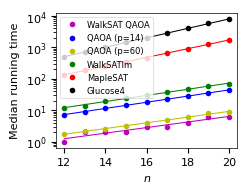

In [10]:
# Plot scaling of solver running times on one graph

# Choose parameters
p = 14
#k, r = 2, 2.0
k, r = 8, 176.54
#selected_all_methods_df = all_methods_df.query(f"k == {k} and r == {r}")

# Helper functions

def agg_qaoa(benchmarks_df):
    return benchmarks_df.groupby(["k", "r", "n"]).agg({
        **{
            "instance_id": "count",
            "eval_qaoa_runtime": ["mean", "median", "std", median_abs_deviation, "count"]
        }
    })

def agg(benchmarks_df):
    return benchmarks_df.groupby(["k", "r", "n"]).agg({
        **{
            "instance_id": "count",
            "eval_qaoa_runtime": ["mean", "median", "std", median_abs_deviation, "count"],
#            "schoning_runtime": ["mean", "median", "std", median_abs_deviation, "count"],
            "schoning_qaoa_runtime": ["mean", "median", "std", median_abs_deviation, "count"],
            "walksatlm_runtime": ["mean", "median", "std", median_abs_deviation, "count"]
        },
        **{
            solver_name + "_runtime": ["mean", "median", "std", median_abs_deviation, "count"]
            for solver_name in analysis_helpers.pysat_solvers
        }
    })

def plot_scaling(ax, name, label, colour, df):
    xvals = df.index.get_level_values(2)
    yvals = df[name]["median"]
    a, b = np.polyfit(xvals, np.log2(yvals), 1)
    ax.semilogy(xvals, yvals, "o", label=label, color=colour)
    ax.semilogy(xvals, [2**(a*x + b) for x in xvals], color=colour)
    print(f"{label} scaling: 2^({a}n+{b})")

# Extract data

selected_qaoa_benchmarks_df_1 = qaoa_benchmarks_df.query(f"p == 14")
selected_qaoa_benchmarks_df_2 = agg_qaoa(qaoa_benchmarks_df.query(f"p == 60 and k == {k} and r == {r}"))
all_methods_df = reduce(
    lambda df1, df2: pd.merge(df1, df2, how="outer", on=("n", "k", "r", "instance_id")),
    #[selected_qaoa_benchmarks_df, schoning_benchmarks_df, schoning_qaoa_benchmarks_df, walksatlm_df, pysat_benchmarks_df]
    [selected_qaoa_benchmarks_df_1, schoning_qaoa_benchmarks_df, walksatlm_df, pysat_benchmarks_df]
    #[selected_qaoa_benchmarks_df, schoning_benchmarks_df, walksatlm_df, pysat_benchmarks_df]
)
all_methods_agg_df = agg(all_methods_df)

selected_all_methods_agg_df = all_methods_agg_df.query(f"k == {k} and r == {r}")

# Create plots and fits

fig, ax = plt.subplots(figsize=figsize_revtex(2/3))

plot_scaling(ax, "schoning_qaoa_runtime", f"WalkSAT QAOA", "m", df=selected_all_methods_agg_df)
plot_scaling(ax, "eval_qaoa_runtime", f"QAOA (p=14)", "b", df=selected_all_methods_agg_df)
plot_scaling(ax, "eval_qaoa_runtime", f"QAOA (p=60)", "y", df=selected_qaoa_benchmarks_df_2)
plot_scaling(ax, "walksatlm_runtime", "WalkSATlm", "g", df=selected_all_methods_agg_df)
plot_scaling(ax, "maplesat_runtime", "MapleSAT", "r", df=selected_all_methods_agg_df)
plot_scaling(ax, "glucose4_runtime", "Glucose4", "k", df=selected_all_methods_agg_df)

#plt.semilogy(selected_all_methods_agg_df.index.get_level_values(2), selected_all_methods_agg_df["eval_qaoa_runtime"]["median"], "-o", color="b")

# def plot_runtime_agg_benchmark(name, runtime_agg):
#     plt.semilogy(selected_all_methods_agg_df.index.get_level_values(2), runtime_agg["median"], "-o", color="b")
#     plt.fill_between(
#         selected_all_methods_agg_df.index.get_level_values(2),
#         runtime_agg["median"] - runtime_agg["median_abs_deviation"] / np.sqrt(runtime_agg["count"]),
#         runtime_agg["median"] + runtime_agg["median_abs_deviation"] / np.sqrt(runtime_agg["count"]),
#         color="b",
#         alpha=0.2
#     )
    
    
ax.set_xlabel("$n$")
ax.set_ylabel("Median running time")
ax.legend()
fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, "scaling_comparison.pdf"), bbox_inches="tight")
plt.show()
    # CHANGE AFTER DOING SCHONING-QAOA
#    linreg = linregress(selected_all_methods_agg_df.query("n <= 16").index.get_level_values(2), np.log2(runtime_agg.query("n <= 16")["median"]))
#    return linreg

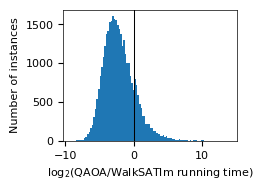

In [11]:
# Histogram comparing QAOA and WalkSATlm

p = 60
k, r = 8, 176.54

selected_qaoa_benchmarks_df = qaoa_benchmarks_df.query(f"p == {p}")
methods_df = reduce(
    lambda df1, df2: pd.merge(df1, df2, how="outer", on=("n", "k", "r", "instance_id")),
    #[selected_qaoa_benchmarks_df, schoning_benchmarks_df, schoning_qaoa_benchmarks_df, walksatlm_df, pysat_benchmarks_df]
    [selected_qaoa_benchmarks_df, walksatlm_df]
    #[selected_qaoa_benchmarks_df, schoning_benchmarks_df, walksatlm_df, pysat_benchmarks_df]
)

selected_methods_df = methods_df.query(f"k == {k} and r == {r}")

ratios = (selected_methods_df["eval_qaoa_runtime"] / selected_methods_df["walksatlm_runtime"])

fig, ax = plt.subplots(figsize=figsize_revtex(2/3))
ax.hist(np.log2(ratios), bins=100)
ax.axvline(0, color="k")

ax.set_xlabel("$\log_2($QAOA$/$WalkSATlm running time$)$")
ax.set_ylabel("Number of instances")

fig.tight_layout(pad=0)
fig.savefig(Path(FIGURES_DIRECTORY, "qaoa_walksatlm_hist.pdf"), bbox_inches="tight")
plt.show()